<a href="https://colab.research.google.com/github/GabrieleKasputyte/Duomenu-gavyba/blob/main/GK_Classification_with_synthetic_dat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Automatically created module for IPython interactive environment


No handles with labels found to put in legend.


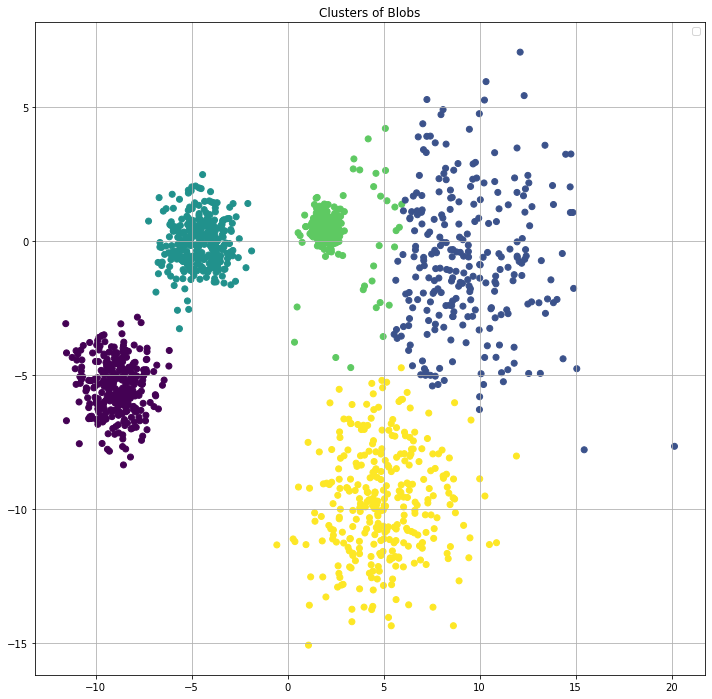

In [ ]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

plt.figure(figsize=(12, 12))

n_samples = 1500
random_state = 170
# nurodom sklaidą klasteriuose
c_std=[1,1,0.4,2,3]
X, y = make_blobs(n_samples=n_samples, random_state=random_state, centers=5,n_features=2,cluster_std=c_std)

# Number of clusters
k=5
kmeans = KMeans(n_clusters=k, random_state=random_state)
y_pred = kmeans.fit_predict(X)

#plt.subplot(221)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title("Clusters of Blobs")
plt.legend()
plt.grid(True)
plt.show()


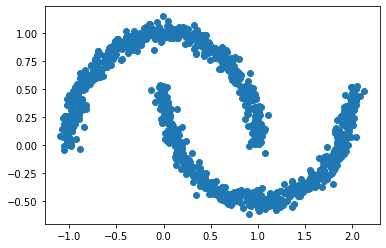

In [ ]:
# Demo naudojami duomenys2 yra moons
from sklearn.datasets import make_moons
X2, y2 = make_moons(n_samples=1000, noise=0.05)
plt.scatter(X2[:, 0], X2[:, 1])

Turime pasiruošti duomenis mokymui ir testavimui

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_pred, random_state=1)
print("Training features/target:", X_train.shape, y_train.shape)
print("Testing features/target:", X_test.shape, y_test.shape)
#y_train.value_counts()
#y_test.value_counts()

Training features/target: (1125, 2) (1125,)
Testing features/target: (375, 2) (375,)


Greitas klasifikatorių palyginimas
Nuoroda į medžiagą 
https://github.com/DavidMertz/ML-Webinar

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis
from sklearn.dummy import DummyClassifier

classifiers = {
    "Dummy"        : DummyClassifier(strategy='uniform', random_state=2),
    "KNN(3)"       : KNeighborsClassifier(3), 
    "RBF SVM"      : SVC(gamma=2, C=1), 
   "Decision Tree": DecisionTreeClassifier(max_depth=7), 
   # "Random Forest": RandomForestClassifier(max_depth=7, n_estimators=10, max_features=4), 
   # "Neural Net"   : MLPClassifier(alpha=1), 
   # "AdaBoost"     : AdaBoostClassifier(),
    "Naive Bayes"  : GaussianNB(), 
    "QDA"          : QuadraticDiscriminantAnalysis(),
    "LDA"          : LinearDiscriminantAnalysis(),
   # "Linear SVC"   : LinearSVC(),
   # "Linear SVM"   : SVC(kernel="linear"), 
   # "Gaussian Proc": GaussianProcessClassifier(1.0 * RBF(1.0)),
}

In [ ]:
from time import time
from sklearn.metrics import confusion_matrix

nfast = 10      # Don't run the very slow ones
head = list(classifiers.items())[:nfast]

for name, classifier in head:
    start = time()
    classifier.fit(X_train, y_train)
    train_time = time() - start
    start = time()
    score = classifier.score(X_test, y_test)
    y_pred_test = classifier.predict(X_test)
    y_pred_train = classifier.predict(X_train)
    score_time = time()-start
    print("{:<15}| score = {:.3f} | time = {:,.3f}s/{:,.3f}s".format(name, score, train_time, score_time))
    print("Confusion table on training data")
    print(confusion_matrix(y_train, y_pred_train))
    print("Confusion table on test data")
    print(confusion_matrix(y_test, y_pred_test))

Dummy          | score = 0.197 | time = 0.006s/0.002s
Confusion table on training data
[[42 42 46 45 55]
 [43 46 40 53 29]
 [42 55 46 40 35]
 [45 41 53 50 46]
 [45 51 54 40 41]]
Confusion table on test data
[[12 17 12 18 11]
 [ 8  7 11  9 11]
 [17 17 19 14 15]
 [17 19 23 23 16]
 [18 11 19 18 13]]
KNN(3)         | score = 0.989 | time = 0.004s/0.063s
Confusion table on training data
[[230   0   0   0   0]
 [  0 211   0   0   0]
 [  0   0 218   0   0]
 [  0   2   0 232   1]
 [  0   2   0   0 229]]
Confusion table on test data
[[70  0  0  0  0]
 [ 0 46  0  0  0]
 [ 0  0 82  0  0]
 [ 0  3  0 94  1]
 [ 0  0  0  0 79]]
RBF SVM        | score = 0.973 | time = 0.085s/0.040s
Confusion table on training data
[[230   0   0   0   0]
 [  0 211   0   0   0]
 [  0   0 218   0   0]
 [  0   2   0 233   0]
 [  0   0   0   0 231]]
Confusion table on test data
[[69  1  0  0  0]
 [ 0 45  0  1  0]
 [ 0  2 80  0  0]
 [ 0  5  0 92  1]
 [ 0  0  0  0 79]]
Decision Tree  | score = 0.992 | time = 0.003s/0.001s
Co

Kaip suicide duomenims tinka sprendimų medžio ar artimiausio kaimyno klasifikatoriai? Pradedam su sprendimų medžiu.
Savarankiškai bandom suklasifikuoti duomenis pagal amžių , lytį, kartą ir metus. 
# Modifikuokit kodą žemiau kaip tinkama, arba dirbkite savuoju būdu

In [ ]:
import pandas as pd
# ikeliu duomenis is Github, taip patogiau
url="https://raw.githubusercontent.com/erinijapranckeviciene/MLdata/main/Kaggle-data-suic.csv"
data = pd.read_csv(url)
print(data.dtypes)
#print(type(data))

country                object
year                    int64
sex                    object
age                    object
suicides_no             int64
population              int64
suicides/100k pop     float64
country-year           object
HDI for year          float64
 gdp_for_year ($)      object
gdp_per_capita ($)      int64
generation             object
dtype: object


In [ ]:
data['generation'].value_counts()

Generation X       6408
Silent             6364
Millenials         5844
Boomers            4990
G.I. Generation    2744
Generation Z       1470
Name: generation, dtype: int64

In [ ]:
data['country'].value_counts()
#data['country'].unique()

Mauritius                 382
Iceland                   382
Netherlands               382
Austria                   382
Spain                     372
                         ... 
Bosnia and Herzegovina     24
Macau                      12
Cabo Verde                 12
Dominica                   12
Mongolia                   10
Name: country, Length: 101, dtype: int64

In [ ]:
data['age'].value_counts()

55-74 years    4642
15-24 years    4642
35-54 years    4642
75+ years      4642
25-34 years    4642
5-14 years     4610
Name: age, dtype: int64

In [ ]:
data.describe(include=['int','int64','float','object'])

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
count,27820,27820.000000,27820,27820,27820.000000,2.782000e+04,27820.000000,27820,8364.000000,27820,27820.000000,27820
unique,101,NaN,2,6,NaN,NaN,NaN,2321,NaN,2321,NaN,6
top,Mauritius,NaN,female,55-74 years,NaN,NaN,NaN,Turkmenistan1997,NaN,"5,231,382,674,594",NaN,Generation X
freq,382,NaN,13910,4642,NaN,NaN,NaN,12,NaN,12,NaN,6408
mean,NaN,2001.258375,NaN,NaN,242.574407,1.844794e+06,12.816097,NaN,0.776601,NaN,16866.464414,NaN
std,NaN,8.469055,NaN,NaN,902.047917,3.911779e+06,18.961511,NaN,0.093367,NaN,18887.576472,NaN
min,NaN,1985.000000,NaN,NaN,0.000000,2.780000e+02,0.000000,NaN,0.483000,NaN,251.000000,NaN
25%,NaN,1995.000000,NaN,NaN,3.000000,9.749850e+04,0.920000,NaN,0.713000,NaN,3447.000000,NaN
50%,NaN,2002.000000,NaN,NaN,25.000000,4.301500e+05,5.990000,NaN,0.779000,NaN,9372.000000,NaN
75%,NaN,2008.000000,NaN,NaN,131.000000,1.486143e+06,16.620000,NaN,0.855000,NaN,24874.000000,NaN


In [ ]:
print(data.columns)

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')


In [ ]:
data.columns=['country','year', 'sex', 'age', 'suicides_no', 'population','suicides_per_100k','country_year','HDI_for_year','ggdp_for_year','gdp_per_capita','generation']
print(data.columns)

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides_per_100k', 'country_year', 'HDI_for_year', 'ggdp_for_year',
       'gdp_per_capita', 'generation'],
      dtype='object')


In [ ]:
data_new=data.drop(['country_year','ggdp_for_year','HDI_for_year'], axis=1)
#country=data.country
#print(country)

Kategorinius kintamuosius sex, age, generation, reikia perkoduoti taip, kad jie tiktų klasifikavimui ir regresijai. Panaudojam "one hot encoding" . Kadangi mes turim 101 šalį, įtraukdami į perkodavimą sukurtume šimtą papildomų stulpelių. Todėl šalį prijungiam tada kada perkoduojam kitus požymius.

In [ ]:
data_tmp=data.drop(['country','country_year','ggdp_for_year','HDI_for_year'], axis=1)
country=data.country
#print(country)

In [ ]:
data_dummies=pd.get_dummies(data_tmp)
list(data_dummies.columns)

['year',
 'suicides_no',
 'population',
 'suicides_per_100k',
 'gdp_per_capita',
 'sex_female',
 'sex_male',
 'age_15-24 years',
 'age_25-34 years',
 'age_35-54 years',
 'age_5-14 years',
 'age_55-74 years',
 'age_75+ years',
 'generation_Boomers',
 'generation_G.I. Generation',
 'generation_Generation X',
 'generation_Generation Z',
 'generation_Millenials',
 'generation_Silent']

In [ ]:
#prijungiam coutry atgal
data_ready=pd.concat([country,data_dummies], axis=1)
data_ready.head()

,country,year,suicides_no,population,suicides_per_100k,gdp_per_capita,sex_female,sex_male,age_15-24 years,age_25-34 years,age_35-54 years,age_5-14 years,age_55-74 years,age_75+ years,generation_Boomers,generation_G.I. Generation,generation_Generation X,generation_Generation Z,generation_Millenials,generation_Silent
0,Albania,1987,21,312900,6.71,796,0,1,1,0,0,0,0,0,0,0,1,0,0,0
1,Albania,1987,16,308000,5.19,796,0,1,0,0,1,0,0,0,0,0,0,0,0,1
2,Albania,1987,14,289700,4.83,796,1,0,1,0,0,0,0,0,0,0,1,0,0,0
3,Albania,1987,1,21800,4.59,796,0,1,0,0,0,0,0,1,0,1,0,0,0,0
4,Albania,1987,9,274300,3.28,796,0,1,0,1,0,0,0,0,1,0,0,0,0,0


Kokius klausimus galėtume paklausti turėdami šiuos duomenis? Kas mūsų "Target"? Pasirinkime suicides ir ištirkime kokie faktoriai geriausiai prognozuoja šį dydį . Mes matom kad suicides_per_100k trečias kvartilis yra 16. Galim skelti į dvi klases Klase 1 suicides_per_100k<=15 ir Klase 2 suicides_per_100k>15, kur savižudybių daugiau negu vidutiniškai. Pabandysime rasti taisyklę su kuria galim atskirti šias dvi klases.

In [ ]:
import statistics
statistics.mean(data_ready.population)

1844793.6173975556

In [ ]:
y=data_ready.population > statistics.mean(data_ready.population)
X=data_ready.drop(['country','population'],axis=1)
country=data_ready.country
X.head()

,year,suicides_no,suicides_per_100k,gdp_per_capita,sex_female,sex_male,age_15-24 years,age_25-34 years,age_35-54 years,age_5-14 years,age_55-74 years,age_75+ years,generation_Boomers,generation_G.I. Generation,generation_Generation X,generation_Generation Z,generation_Millenials,generation_Silent
0,1987,21,6.71,796,0,1,1,0,0,0,0,0,0,0,1,0,0,0
1,1987,16,5.19,796,0,1,0,0,1,0,0,0,0,0,0,0,0,1
2,1987,14,4.83,796,1,0,1,0,0,0,0,0,0,0,1,0,0,0
3,1987,1,4.59,796,0,1,0,0,0,0,0,1,0,1,0,0,0,0
4,1987,9,3.28,796,0,1,0,1,0,0,0,0,1,0,0,0,0,0


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
print("Training features/target:", X_train.shape, y_train.shape)
print("Testing features/target:", X_test.shape, y_test.shape)
y_train.value_counts()
y_test.value_counts()

Training features/target: (20865, 18) (20865,)
Testing features/target: (6955, 18) (6955,)


False    5352
True     1603
Name: population, dtype: int64

Kadangi šie duomenys yra įvairių duomenų tipų mišinys jiems labai gerai tinka sprendimų medžio ar artimiausio kaimyno klasifikatoriai. Pradedam su sprendimų medžiu.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=3, random_state=0)
tree.fit(X, y)
tree.score(X, y)

0.9250898634076204

Kurie požymiai yra svarbiausi

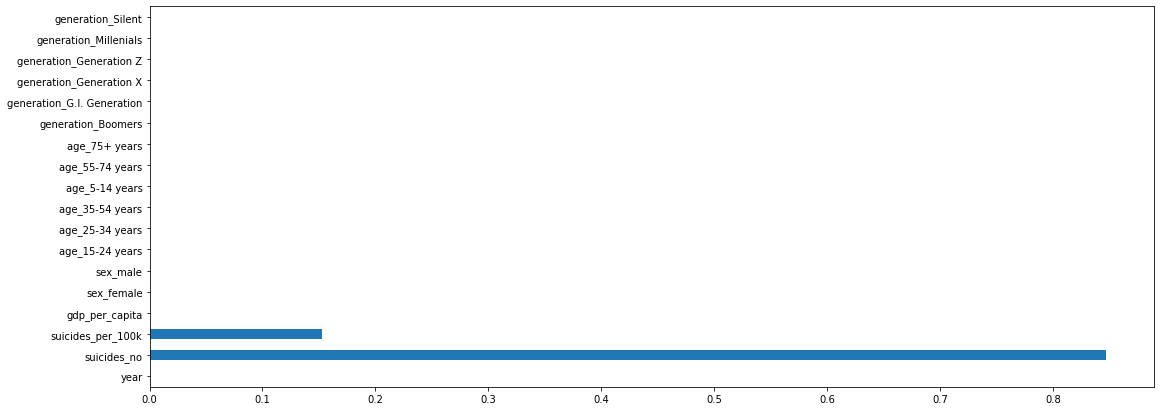

In [ ]:
%matplotlib inline
pd.Series(tree.feature_importances_, index=X.columns).plot.barh(figsize=(18,7));

In [ ]:
# Figure out where graphviz executable lives
dotpath = !which dot

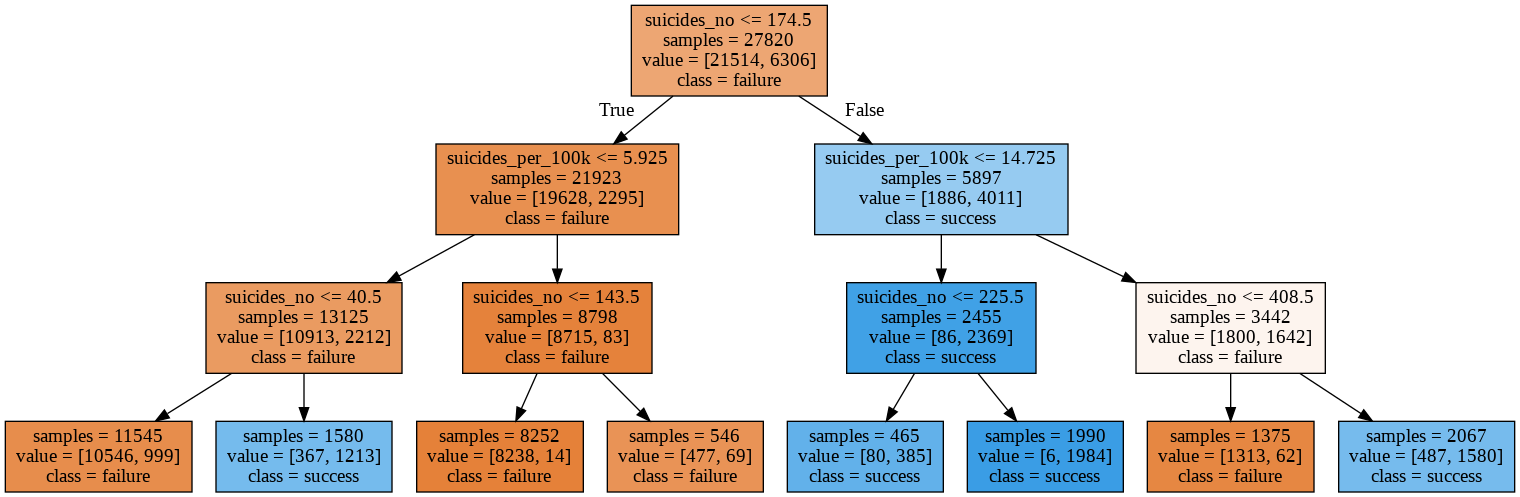

In [ ]:
# Generate cut point diagram
from sklearn.tree import export_graphviz
import sys, subprocess
from IPython.display import Image

export_graphviz(tree, feature_names=X.columns, class_names=['failure','success'],
                out_file='ml-good.dot', impurity=False, filled=True)
subprocess.check_call([dotpath[0],'-Tpng','ml-good.dot','-o','ml-good.png'])
Image('ml-good.png')

In [ ]:
y=data_ready['age_75+ years']
X=data_ready.drop(['country','age_75+ years'],axis=1)
country=data_ready.country
X.head()

,year,suicides_no,population,suicides_per_100k,gdp_per_capita,sex_female,sex_male,age_15-24 years,age_25-34 years,age_35-54 years,age_5-14 years,age_55-74 years,generation_Boomers,generation_G.I. Generation,generation_Generation X,generation_Generation Z,generation_Millenials,generation_Silent
0,1987,21,312900,6.71,796,0,1,1,0,0,0,0,0,0,1,0,0,0
1,1987,16,308000,5.19,796,0,1,0,0,1,0,0,0,0,0,0,0,1
2,1987,14,289700,4.83,796,1,0,1,0,0,0,0,0,0,1,0,0,0
3,1987,1,21800,4.59,796,0,1,0,0,0,0,0,0,1,0,0,0,0
4,1987,9,274300,3.28,796,0,1,0,1,0,0,0,1,0,0,0,0,0


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
print("Training features/target:", X_train.shape, y_train.shape)
print("Testing features/target:", X_test.shape, y_test.shape)
y_train.value_counts()
y_test.value_counts()

Training features/target: (20865, 18) (20865,)
Testing features/target: (6955, 18) (6955,)


0    5813
1    1142
Name: age_75+ years, dtype: int64

0.9773544212796549


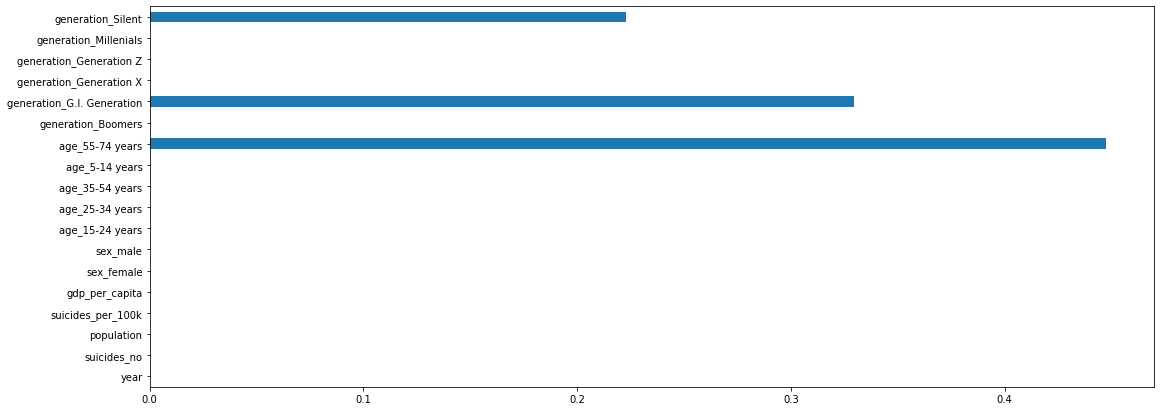

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=3, random_state=0)
tree.fit(X, y)
print(tree.score(X, y))

%matplotlib inline
pd.Series(tree.feature_importances_, index=X.columns).plot.barh(figsize=(18,7));

# Figure out where graphviz executable lives
dotpath = !which dot

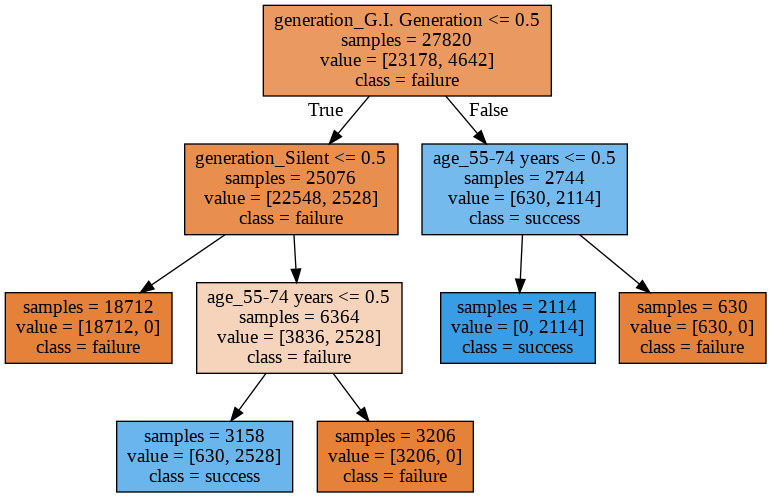

In [ ]:
# Generate cut point diagram
from sklearn.tree import export_graphviz
import sys, subprocess
from IPython.display import Image

export_graphviz(tree, feature_names=X.columns, class_names=['failure','success'],
                out_file='ml-good.dot', impurity=False, filled=True)
subprocess.check_call([dotpath[0],'-Tpng','ml-good.dot','-o','ml-good.png'])
Image('ml-good.png')